In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import time
import os
from scipy.interpolate import interp1d, interp2d

import antisym_func

In [2]:
#parameters for all models
mu = 0.6
R_mfp = 50 #Mpc
M_max = antisym_func.RtoM(R_mfp)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
NUM = 100; z_zeta_interp_array = np.linspace(5.5, 13.5, NUM)

#zeta_z_func for the black curve
T_vir_black = 5e4 # K
zeta_black = (float)(32.5) #the efficiency factor of reionization
zeta_z_interp_array = []
for i in range(NUM):
    zeta_z_interp_array.append(antisym_func.zeta_z(z_zeta_interp_array[i], zeta_black, T_vir_black, mu))
zeta_z_func_black = interp1d(z_zeta_interp_array, zeta_z_interp_array, kind = 'cubic')

#zeta_z_func for the green curve
T_vir_green = 5e4 # K
zeta_green = (float)(47) #the efficiency factor of reionization
zeta_z_interp_array = []
for i in range(NUM):
    zeta_z_interp_array.append(antisym_func.zeta_z(z_zeta_interp_array[i], zeta_green, T_vir_green, mu))
zeta_z_func_green = interp1d(z_zeta_interp_array, zeta_z_interp_array, kind = 'cubic')

#zeta_z_func for the blue curve
T_vir_blue = 4.1e4 # K
zeta_blue = (float)(37.5) #the efficiency factor of reionization
zeta_z_interp_array = []
for i in range(NUM):
    zeta_z_interp_array.append(antisym_func.zeta_z(z_zeta_interp_array[i], zeta_blue, T_vir_blue, mu))
zeta_z_func_blue = interp1d(z_zeta_interp_array, zeta_z_interp_array, kind = 'cubic')

#zeta_z_func for the cyan curve
T_vir_cyan = 6.67e4 # K
zeta_cyan = (float)(32.5) #the efficiency factor of reionization
zeta_z_interp_array = []
for i in range(NUM):
    zeta_z_interp_array.append(antisym_func.zeta_z(z_zeta_interp_array[i], zeta_cyan, T_vir_cyan, mu))
zeta_z_func_cyan = interp1d(z_zeta_interp_array, zeta_z_interp_array, kind = 'cubic')

In [4]:
#read in the history of Zhou et al. (2021)
z_HI = np.loadtxt('../data/zhou/history/history_z.txt')
HI_simu_black = np.loadtxt('../data/zhou/history/history_HI_black.txt')
[z_dxHdz, dxHdz_simu_black] = antisym_func.dxH_dz_cal(z_HI, HI_simu_black)
HI_simu_green = np.loadtxt('../data/zhou/history/history_HI_green.txt')
[z_dxHdz, dxHdz_simu_green] = antisym_func.dxH_dz_cal(z_HI, HI_simu_green)
HI_simu_blue = np.loadtxt('../data/zhou/history/history_HI_blue.txt')
[z_dxHdz, dxHdz_simu_blue] = antisym_func.dxH_dz_cal(z_HI, HI_simu_blue)
HI_simu_cyan = np.loadtxt('../data/zhou/history/history_HI_cyan.txt')
[z_dxHdz, dxHdz_simu_cyan] = antisym_func.dxH_dz_cal(z_HI, HI_simu_cyan)

#calculate the analytical history
HI_ana_black = []
for z in z_HI:
    HI_ana_black.append(1 - antisym_func.bar_Q(z, M_max, zeta_z_func_black, T_vir_black, mu, \
                        antisym_func.PARA_z(z, M_max, zeta_z_func_black, T_vir_black, mu)))
[z_dxHdz, dxHdz_ana_black] = antisym_func.dxH_dz_cal(z_HI, HI_ana_black)
HI_ana_green = []
for z in z_HI:
    HI_ana_green.append(1 - antisym_func.bar_Q(z, M_max, zeta_z_func_green, T_vir_green, mu, \
                        antisym_func.PARA_z(z, M_max, zeta_z_func_green, T_vir_green, mu)))
[z_dxHdz, dxHdz_ana_green] = antisym_func.dxH_dz_cal(z_HI, HI_ana_green)
HI_ana_blue = []
for z in z_HI:
    HI_ana_blue.append(1 - antisym_func.bar_Q(z, M_max, zeta_z_func_blue, T_vir_blue, mu, \
                        antisym_func.PARA_z(z, M_max, zeta_z_func_blue, T_vir_blue, mu)))
[z_dxHdz, dxHdz_ana_blue] = antisym_func.dxH_dz_cal(z_HI, HI_ana_blue)
HI_ana_cyan = []
for z in z_HI:
    HI_ana_cyan.append(1 - antisym_func.bar_Q(z, M_max, zeta_z_func_cyan, T_vir_cyan, mu, \
                        antisym_func.PARA_z(z, M_max, zeta_z_func_cyan, T_vir_cyan, mu)))
[z_dxHdz, dxHdz_ana_cyan] = antisym_func.dxH_dz_cal(z_HI, HI_ana_cyan)

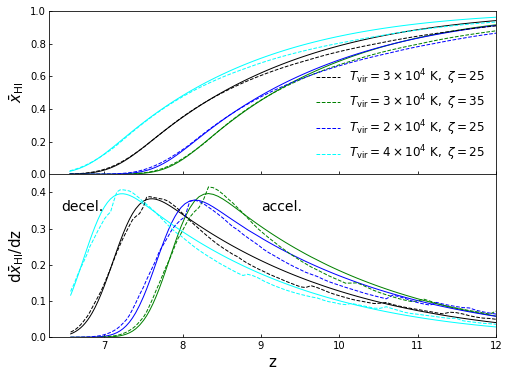

In [5]:
#plot the history
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
fig.subplots_adjust(hspace=0)
    
axs[0].tick_params(direction='in',length=3)
axs[0].plot(z_HI, HI_ana_black, color = 'black', lw=1, ls='-')
axs[0].plot(z_HI, HI_ana_green, color = 'green', lw=1, ls='-')
axs[0].plot(z_HI, HI_ana_blue, color = 'blue', lw=1, ls='-')
axs[0].plot(z_HI, HI_ana_cyan, color = 'cyan', lw=1, ls='-')
axs[0].plot(z_HI, HI_simu_black, color = 'black', lw=1, ls='--', label=r'$T_\mathrm{vir} = 3\times10^4 \ \mathrm{K},\ \zeta=25 $')
axs[0].plot(z_HI, HI_simu_green, color = 'green', lw=1, ls='--', label=r'$T_\mathrm{vir} = 3\times10^4 \ \mathrm{K},\ \zeta=35 $')
axs[0].plot(z_HI, HI_simu_blue, color = 'blue', lw=1, ls='--', label=r'$T_\mathrm{vir} = 2\times10^4 \ \mathrm{K},\ \zeta=25 $')
axs[0].plot(z_HI, HI_simu_cyan, color = 'cyan', lw=1, ls='--', label=r'$T_\mathrm{vir} = 4\times10^4 \ \mathrm{K},\ \zeta=25 $')
axs[0].set_ylabel(r'$\bar{x}_{\mathrm{HI}}$',fontsize=15)
axs[0].set_ylim(0,1)
axs[0].legend(loc=4,fontsize=12, frameon = False)
  
axs[1].plot(z_dxHdz, dxHdz_ana_black, color = 'black', lw=1, ls='-')
axs[1].plot(z_dxHdz, dxHdz_ana_green, color = 'green', lw=1, ls='-')
axs[1].plot(z_dxHdz, dxHdz_ana_blue, color = 'blue', lw=1, ls='-')
axs[1].plot(z_dxHdz, dxHdz_ana_cyan, color = 'cyan', lw=1, ls='-')
axs[1].plot(z_dxHdz, dxHdz_simu_black, color = 'black', lw=1, ls='--')
axs[1].plot(z_dxHdz, dxHdz_simu_green, color = 'green', lw=1, ls='--')
axs[1].plot(z_dxHdz, dxHdz_simu_blue, color = 'blue', lw=1, ls='--')
axs[1].plot(z_dxHdz, dxHdz_simu_cyan, color = 'cyan', lw=1, ls='--')
axs[1].set_ylim(0.0,0.45); axs[1].set_xlim(6.3,12)
axs[1].set_ylabel(r'd$\bar{x}_{\mathrm{HI}}$/dz',fontsize=15)
axs[1].set_xlabel('z',fontsize=15)
axs[1].tick_params(direction='in',length=3)
axs[1].text(9, 0.35,'accel.',fontsize=14); axs[1].text(6.45, 0.35, 'decel.', fontsize = 14)

plt.savefig('../figures/history_comparison_all_models.png', bbox_inches='tight', dpi=200)

In [11]:
#read in the simulation dipole fitting curve
dxHdz_array = np.loadtxt('../data/zhou/fitting/dxHdz_zhou_fitting.txt')
A_R_array = np.loadtxt('../data/zhou/fitting/A_R.txt')
n_R_array = np.loadtxt('../data/zhou/fitting/n_R.txt')
beta_R_array = np.loadtxt('../data/zhou/fitting/beta_R.txt')
alpha_R_array = np.loadtxt('../data/zhou/fitting/alpha_R.txt')

#the dxHdz of simulation compuation
dxHdz_acc_antisym = np.loadtxt('../data/zhou/dxdz_zhou_acc_ana.txt')
dxHdz_dec_antisym = np.loadtxt('../data/zhou/dxdz_zhou_dec_ana.txt')

#read in the simulation dipole data
NUM_SIGMA = 2
kh_acc_simu = []; Pk_A_acc_1 = []; Pk_A_acc_2 = []; Pk_A_acc_3 = []; Pk_A_acc_4 = []; Pk_A_acc_max =[]; Pk_A_acc_min =[]
Pk_acc_fit_error_upper = []; Pk_acc_fit_error_lower = []
ct = 0
for dxHdz in [246, 312, 378]:
    with open('../data/zhou/pa384Mpcdxdz%dlgaccel.txt'%dxHdz, 'r', encoding='utf-8') as file:
        i = 0
        kh_acc_simu.append([]); Pk_A_acc_1.append([]); Pk_A_acc_2.append([]); Pk_A_acc_3.append([]); Pk_A_acc_4.append([]); 
        Pk_A_acc_max.append([]); Pk_A_acc_min.append([]);
        Pk_acc_fit_error_upper.append([]); Pk_acc_fit_error_lower.append([])
        for line in file:
            if (i >= 1 and i <= 16):
                data_line = line.strip("\n").split()
                kh_acc_simu[-1].append(float(data_line[0]))
                Pk_A_acc_1[-1].append(float(data_line[1]))
                Pk_A_acc_2[-1].append(float(data_line[3]))
                Pk_A_acc_3[-1].append(float(data_line[5]))
                Pk_A_acc_4[-1].append(float(data_line[7]))
                Pk_A_acc_max[-1].append(max(float(data_line[1]), float(data_line[3]), float(data_line[5]), float(data_line[7])))
                Pk_A_acc_min[-1].append(min(float(data_line[1]), float(data_line[3]), float(data_line[5]), float(data_line[7])))
                Pk_A_fit = antisym_func.vec_antisym_fit_curve([kh_acc_simu[-1][-1]], A_R_array[ct], n_R_array[ct], beta_R_array[ct], alpha_R_array[ct])[0]
                error = 0
                for j in [1, 3, 5, 7]:
                    error += (Pk_A_fit - float(data_line[j])) ** 2
                error = (error / 4) ** 0.5
                Pk_acc_fit_error_upper[-1].append(Pk_A_fit + NUM_SIGMA * error)
                Pk_acc_fit_error_lower[-1].append(Pk_A_fit - NUM_SIGMA * error)
            i += 1
    ct += 1

kh_dec_simu = []; Pk_A_dec_1 = []; Pk_A_dec_2 = []; Pk_A_dec_3 = []; Pk_A_dec_4 = []; Pk_A_dec_max =[]; Pk_A_dec_min =[]
Pk_dec_fit_error_upper = []; Pk_dec_fit_error_lower = []
ct = 0
for dxHdz in [246, 312, 378]:
    with open('../data/zhou/pa384Mpcdxdz%dlgdecel.txt'%dxHdz, 'r', encoding='utf-8') as file:
        if (dxHdz == 378):
            i = 0
            kh_dec_simu.append([]); Pk_A_dec_1.append([]); Pk_A_dec_2.append([]); Pk_A_dec_3.append([]); Pk_A_dec_4.append([]); 
            Pk_A_dec_max.append([]); Pk_A_dec_min.append([]);
            Pk_dec_fit_error_upper.append([]); Pk_dec_fit_error_lower.append([])
            for line in file:
                if (i >= 1 and i <= 16):
                    data_line = line.strip("\n").split()
                    kh_dec_simu[-1].append(float(data_line[0]))
                    Pk_A_dec_1[-1].append(float(data_line[1]))
                    Pk_A_dec_2[-1].append(float(data_line[3]))
                    Pk_A_dec_3[-1].append(float(data_line[5]))
                    Pk_A_dec_4[-1].append(float(data_line[7]))
                    Pk_A_dec_max[-1].append(max(float(data_line[1]), float(data_line[3]), float(data_line[5]), float(data_line[7])))
                    Pk_A_dec_min[-1].append(min(float(data_line[1]), float(data_line[3]), float(data_line[5]), float(data_line[7])))
                    Pk_A_fit = antisym_func.vec_antisym_fit_curve([kh_dec_simu[-1][-1]], A_R_array[5 - ct], n_R_array[5 - ct], beta_R_array[5 - ct], alpha_R_array[5 - ct])[0]
                    error = 0
                    for j in [1, 3, 5, 7]:
                        error += (Pk_A_fit - float(data_line[j])) ** 2
                    error = (error / 4) ** 0.5
                    Pk_dec_fit_error_upper[-1].append(Pk_A_fit + NUM_SIGMA * error)
                    Pk_dec_fit_error_lower[-1].append(Pk_A_fit - NUM_SIGMA * error)
                i += 1
        i = 0
        kh_dec_simu.append([]); Pk_A_dec_1.append([]); Pk_A_dec_2.append([]); Pk_A_dec_3.append([]);
        Pk_A_dec_max.append([]); Pk_A_dec_min.append([]);
        Pk_dec_fit_error_upper.append([]); Pk_dec_fit_error_lower.append([])
        for line in file:
            if (i >= 1 and i <= 16):
                data_line = line.strip("\n").split()
                kh_dec_simu[-1].append(float(data_line[0]))
                Pk_A_dec_1[-1].append(float(data_line[1]))
                Pk_A_dec_2[-1].append(float(data_line[3]))
                Pk_A_dec_3[-1].append(float(data_line[5]))
                Pk_A_dec_max[-1].append(max(float(data_line[1]), float(data_line[3]), float(data_line[5])))
                Pk_A_dec_min[-1].append(min(float(data_line[1]), float(data_line[3]), float(data_line[5])))
                Pk_A_fit = antisym_func.vec_antisym_fit_curve([kh_dec_simu[-1][-1]], A_R_array[5 - ct], n_R_array[5 - ct], beta_R_array[5 - ct], alpha_R_array[5 - ct])[0]
                error = 0
                for j in [1, 3, 5]:
                    error += (Pk_A_fit - float(data_line[j])) ** 2
                error = (error / 3) ** 0.5
                Pk_dec_fit_error_upper[-1].append(Pk_A_fit + NUM_SIGMA * error)
                Pk_dec_fit_error_lower[-1].append(Pk_A_fit - NUM_SIGMA * error)
            i += 1
    ct += 1
    
#read in the analytical data
data_acc_black = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(32.5, 5e4, 50, 384))
data_dec_black = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(32.5, 5e4, 50, 384))
data_acc_green = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(47, 5e4, 50, 384))
data_dec_green = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(47, 5e4, 50, 384))
data_acc_blue = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(37.5, 4.1e4, 50, 384))
data_dec_blue = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(37.5, 4.1e4, 50, 384))
data_acc_cyan = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(32.5, 6.67e4, 50, 384))
data_dec_cyan = np.load('../data/antisym_observability/Pk_A_model_examination/zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(32.5, 6.67e4, 50, 384))

dxHdz_acc_antisym = list(data_acc_black['dxHdz_xi_acc_smoothed_array'])
dxHdz_dec_antisym = list(data_dec_black['dxHdz_xi_dec_smoothed_array'])
kh_array = list(data_acc_black['kh_array'])

z_ana_acc = []; z_ana_dec = []; Pk_A_acc = []; Pk_A_dec = [] 
filename = ['black', 'blue', 'green', 'cyan']
z_ana_acc.append(list(data_acc_black['z_xi_acc_smoothed_array']))
z_ana_acc.append(list(data_acc_blue['z_xi_acc_smoothed_array']))
z_ana_acc.append(list(data_acc_green['z_xi_acc_smoothed_array']))
z_ana_acc.append(list(data_acc_cyan['z_xi_acc_smoothed_array']))
z_ana_dec.append(list(data_dec_black['z_xi_dec_smoothed_array']))
z_ana_dec.append(list(data_dec_blue['z_xi_dec_smoothed_array']))
z_ana_dec.append(list(data_dec_green['z_xi_dec_smoothed_array']))
z_ana_dec.append(list(data_dec_cyan['z_xi_dec_smoothed_array']))

Pk_A_acc.append(list(data_acc_black['Pk_A_acc_map']))
Pk_A_acc.append(list(data_acc_blue['Pk_A_acc_map']))
Pk_A_acc.append(list(data_acc_green['Pk_A_acc_map']))
Pk_A_acc.append(list(data_acc_cyan['Pk_A_acc_map']))

Pk_A_dec.append(list(data_dec_black['Pk_A_dec_map']))
Pk_A_dec.append(list(data_dec_blue['Pk_A_dec_map']))
Pk_A_dec.append(list(data_dec_green['Pk_A_dec_map']))
Pk_A_dec.append(list(data_dec_cyan['Pk_A_dec_map']))

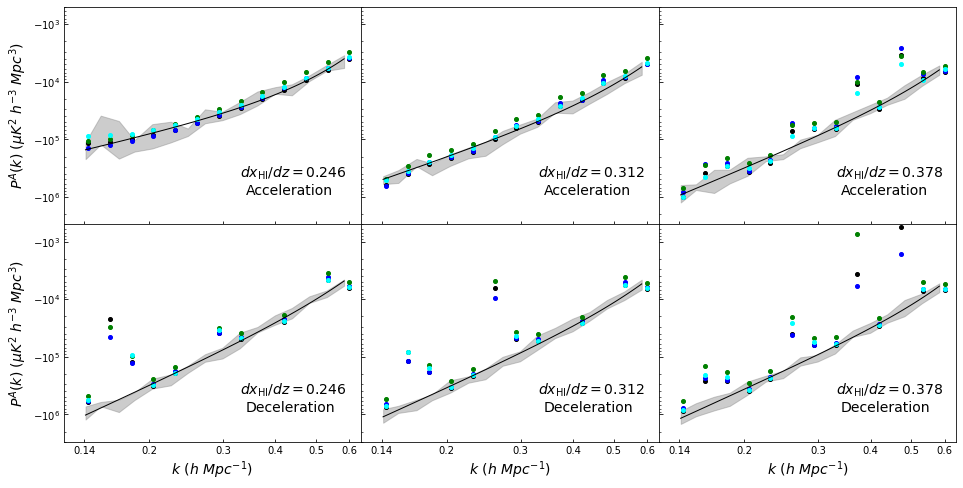

In [19]:
#plot the comparison
fig, axs = plt.subplots(2, 3, sharey=True, sharex=True, figsize=(16, 8))
fig.subplots_adjust(wspace=0, hspace=0)
ct = 0
for i in range(len(z_ana_acc[0])):
    if (dxHdz_acc_antisym[i] == dxHdz_array[ct]):
        for j in range(len(filename)):
            name = filename[j]
            axs[0, ct].loglog(kh_array[3:], Pk_A_acc[j][i][3:], '.', markersize = 8, linewidth = 0.6, color = '%s'%name)
        #the simulation result fitted line
        PkA_simu_fit_plot = antisym_func.vec_antisym_fit_curve(np.linspace(0.141, 0.583, 100), A_R_array[ct], n_R_array[ct], beta_R_array[ct], alpha_R_array[ct])
        axs[0, ct].loglog(np.linspace(0.141, 0.583, 100), PkA_simu_fit_plot, '-', color = 'black', linewidth = 1)
        axs[0, ct].fill_between(kh_acc_simu[ct], Pk_A_acc_max[ct], Pk_A_acc_min[ct], color='grey', alpha=0.4)
        #axs[0, ct].fill_between(kh_acc_simu[ct], Pk_acc_fit_error_upper[ct], Pk_acc_fit_error_lower[ct], color='grey', alpha=0.2)
        axs[0, ct].text(0.33, 4.5e5, '$dx_\mathrm{HI} / dz = %3.3g$'%dxHdz_array[ct], fontsize = 14)
        axs[0, ct].text(0.34, 9e5, 'Acceleration', fontsize=14)
        ct += 1
axs[0, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[0, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[0, 0].set_yticks([1e3, 1e4, 1e5, 1e6])
axs[0, 0].set_yticklabels(['$-10^{3}$', '$-10^{4}$','$-10^{5}$','$-10^{6}$'])
axs[0, 0].set_ylim(5e2, 3e6)
#axs[0].legend(loc=2, fontsize=12)

ct = 0
for i in range(len(z_ana_dec[0])):
    if (dxHdz_dec_antisym[i] == dxHdz_array[ct+3]):
        for j in range(len(filename)):
            name = filename[j]
            axs[1, 2 - ct].loglog(kh_array[3:], Pk_A_dec[j][i][3:], '.', markersize = 8, linewidth = 0.6, color = '%s'%name)
        #the simulation result fitted line
        PkA_simu_fit_plot = antisym_func.vec_antisym_fit_curve(np.linspace(0.141, 0.583, 100), A_R_array[ct+3], n_R_array[ct+3], beta_R_array[ct+3], alpha_R_array[ct+3])
        axs[1, ct].fill_between(kh_dec_simu[ct], Pk_A_dec_max[ct], Pk_A_dec_min[ct], color='grey', alpha=0.4)
        #axs[1, ct].fill_between(kh_dec_simu[ct], Pk_dec_fit_error_upper[ct], Pk_dec_fit_error_lower[ct], color='grey', alpha=0.2)
        axs[1, 2 - ct].loglog(np.linspace(0.141, 0.583, 100), PkA_simu_fit_plot, '-', color = 'black', linewidth = 1, label = '21cmFAST')
        axs[1, 2 - ct].set_xlabel(r'$k\ (h\ Mpc^{-1})$',fontsize = 14)
        axs[1, 2 - ct].set_xticks([0.14,0.2,0.3,0.4,0.5,0.6])
        axs[1, 2 - ct].set_xticklabels(['0.14','0.2','0.3','0.4','0.5','0.6'])
        axs[1, 2 - ct].text(0.33, 4.5e5, '$dx_\mathrm{HI} / dz = %3.3g$'%dxHdz_array[ct+3], fontsize = 14)
        axs[1, 2 - ct].set_xlim(0.125, 0.64)
        axs[1, 2 - ct].text(0.34, 9e5, 'Deceleration', fontsize=14)
        ct += 1
axs[1, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[1, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[1, 0].set_yticks([1e3, 1e4, 1e5, 1e6])
axs[1, 0].set_yticklabels(['$-10^{3}$', '$-10^{4}$','$-10^{5}$','$-10^{6}$'])
axs[1, 0].set_ylim(5e2, 3e6)
axs[1, 0].invert_yaxis()
#axs[0].legend(loc=3, fontsize=12)
fig.savefig('../figures/Pk_A_smoothed_synthesis.png', bbox_inches='tight', dpi=400)

In [24]:
#load in the data of Zhou et al. (2021)
nR_zhou_acc = np.loadtxt('../data/zhou/nR_zhou_acc.txt')
dxHdz_zhou_acc = np.loadtxt('../data/zhou/dxdz_zhou_acc.txt')
nR_error_zhou_acc = np.loadtxt('../data/zhou/nR_error_zhou_acc.txt')

nR_zhou_dec = np.loadtxt('../data/zhou/nR_zhou_dec.txt')
dxHdz_zhou_dec = np.loadtxt('../data/zhou/dxdz_zhou_dec.txt')
nR_error_zhou_dec = np.loadtxt('../data/zhou/nR_error_zhou_dec.txt')

#calculate the powerlaw index n_R
kh_floor = 3; kh_ceil = 9 #in the range of (0.14, 0.27)
A_R_acc = []; n_R_acc = []; n_R_error_acc = []
kh_array_fitting = []; Pk_A_acc_fitting = []; Pk_A_dec_fitting = []
for i in range(len(filename)):
    for kh in kh_array[kh_floor:kh_ceil]:
        kh_array_fitting.append(kh)
    for j in range(len(z_ana_acc[0])):
        if (i == 0): Pk_A_acc_fitting.append([])
        for Pk in Pk_A_acc[i][j][kh_floor:kh_ceil]:
            Pk_A_acc_fitting[j].append(Pk)
    for j in range(len(z_ana_dec[0])):
        if (i == 0): Pk_A_dec_fitting.append([])
        for Pk in Pk_A_dec[i][j][kh_floor:kh_ceil]:
            Pk_A_dec_fitting[j].append(Pk)

fitting_measure = 2
for i in range(len(z_ana_acc[0])):
    A_R_acc.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_acc_fitting[i], fitting_measure)[0])
    n_R_acc.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_acc_fitting[i], fitting_measure)[1])
    n_R_error_acc.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_acc_fitting[i], fitting_measure)[2])
    
A_R_dec = []; n_R_dec = []; n_R_error_dec = []
for i in range(len(z_ana_dec[0])):
    A_R_dec.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_dec_fitting[i], fitting_measure)[0])
    n_R_dec.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_dec_fitting[i], fitting_measure)[1])
    n_R_error_dec.append(antisym_func.fit_nR(kh_array_fitting, Pk_A_dec_fitting[i], fitting_measure)[2])

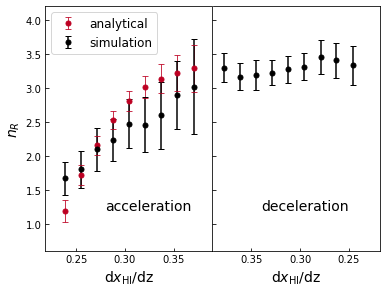

In [28]:
#remove points without simulation counterparts
dxHdz_acc_antisym_plot = list(dxHdz_acc_antisym); n_R_acc_plot = list(n_R_acc); n_R_error_acc_plot = list(n_R_error_acc)
dxHdz_acc_antisym_plot.pop(2); dxHdz_acc_antisym_plot.pop(6); dxHdz_acc_antisym_plot.pop(10)
n_R_acc_plot.pop(2); n_R_acc_plot.pop(6); n_R_acc_plot.pop(10)
n_R_error_acc_plot.pop(2); n_R_error_acc_plot.pop(6); n_R_error_acc_plot.pop(10)

#plot the n_R comparison
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 4.5))
fig.subplots_adjust(wspace=0)

colorlist = ['#0000a5', '#5e6395', '#86b178', '#ffed00']
axs[0].errorbar(dxHdz_acc_antisym_plot[1:], n_R_acc_plot[1:], yerr = n_R_error_acc_plot[1:], fmt='o', markersize = 5, elinewidth = 0.8,  capsize = 3, capthick = 0.8, color = '#bd0022', label = 'analytical')
#axs[1].errorbar(dxHdz_dec_antisym, n_R_dec, yerr = n_R_error_dec, fmt='o', markersize = 5, elinewidth = 0.8, capsize = 3, capthick = 0.8, color = '#bd0022', label = 'analytical')
axs[0].errorbar(dxHdz_zhou_acc[1:], nR_zhou_acc[1:], yerr = nR_error_zhou_acc[1:], fmt='o', markersize = 5, capsize = 3, color = 'black', label = 'simulation')
axs[1].errorbar(dxHdz_zhou_dec, nR_zhou_dec, yerr = nR_error_zhou_dec, fmt='o', markersize = 5, capsize = 3, color = 'black', label = 'simulation')

axs[0].legend(fontsize=12, loc=2)
axs[1].set_xlim(0.218,0.39)
axs[1].invert_xaxis()
axs[0].set_xlabel(r'd$x_\mathrm{HI}$/dz',fontsize=14)
axs[1].set_xlabel(r'd$x_\mathrm{HI}$/dz',fontsize=14)
axs[0].text(0.28, 1.2, 'acceleration',fontsize = 14)
axs[1].text(0.34, 1.2, 'deceleration',fontsize = 14)
axs[0].set_ylabel(r'$n_R$',fontsize=14)
axs[0].set_xlim(0.218,0.39)
axs[0].set_ylim(0.6,4.2)
fig.savefig('../figures/nR_synthesis.png',dpi=200)